#### Data Preparation and Evaluation

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = "C:\\Users\\Dell\\Desktop\\MeriSkill\\HR-Employee-Attrition.csv"

In [3]:
# Read data into pandas dataframe
df = pd.read_csv(data)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Dimensionality
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Data Wrangling

##### Task One - Delete Redundant columns
<p> Redundant columns are columns that have the same or highly correlated values. 
One common way to identify redundant columns is to check for columns with zero or very low variance, as these columns do not provide useful information for analysis.</p>

In [8]:
# Separate numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Separate categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Print the names of numerical columns
print("Numerical Columns:")
print(numerical_columns.columns)

# Print the names of categorical columns
print("Categorical Columns:")
print(categorical_columns.columns)


Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


<p>For the numerical column</p>

In [9]:
# Calculate the variance for each column
variance = numerical_columns.var()

# Find columns with zero or very low variance (you can set a threshold)
redundant_columns = variance[variance <= 0.01]

# Print redundant columns
print("Redundant Columns:")
print(redundant_columns)

Redundant Columns:
EmployeeCount    0.0
StandardHours    0.0
dtype: float64


<p>For the categorical column</p>

In [10]:
# Check for columns with constant or near-constant values (threshold = 0.98)
threshold = 0.98
constant_columns = [col for col in categorical_columns.columns if categorical_columns[col].value_counts(normalize=True).max() >= threshold]

# Print constant columns
print("Constant Columns:")
print(constant_columns)

Constant Columns:
['Over18']


<p>Drop columns from the original dataframe

In [11]:
# Drop the redundant/constant columns from the dataframe
hr_df = df.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18'])
hr_df.shape

(1470, 32)

In [12]:
hr_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


##### Task Two - Renaming the Columns

In [13]:
# Define a dictionary with the column name changes
column_name_changes = {
    'Age': 'EmployeeAge',
    'DailyRate': 'DailySalaryRate',
    'DistanceFromHome': 'DistanceFromHomeInMiles',
    'Education': 'EducationLevel',
    'EmployeeNumber': 'EmployeeID',
    'EnvironmentSatisfaction': 'EnvironmentSatisfactionLevel',
    'HourlyRate': 'HourlySalaryRate',
    'JobInvolvement': 'JobInvolvementLevel',
    'JobSatisfaction': 'JobSatisfactionLevel',
    'MonthlyIncome': 'MonthlyIncome',
    'MonthlyRate': 'MonthlyRate',
    'NumCompaniesWorked': 'NumberOfCompaniesWorked',
    'PercentSalaryHike': 'PercentageSalaryHike',
    'PerformanceRating': 'PerformanceRating',
    'RelationshipSatisfaction': 'RelationshipSatisfactionLevel',
    'StockOptionLevel': 'StockOptionLevel',
    'TotalWorkingYears': 'TotalWorkingYears',
    'TrainingTimesLastYear': 'TrainingTimesLastYear',
    'WorkLifeBalance': 'WorkLifeBalanceLevel',
    'YearsAtCompany': 'YearsAtCompany',
    'YearsInCurrentRole': 'YearsInCurrentRole',
    'YearsSinceLastPromotion': 'YearsSinceLastPromotion',
    'YearsWithCurrManager': 'YearsWithCurrentManager',
    'Attrition': 'AttritionStatus',
    'BusinessTravel': 'BusinessTravelFrequency',
    'OverTime': 'OverTimeStatus'
}

# Rename columns using the dictionary
hr_df.rename(columns=column_name_changes, inplace=True)

##### Task Three - Dropping duplicates

In [14]:
# Dropping duplicates
hr_df = hr_df.drop_duplicates()


##### Task Four - Cleaning individual columns

<p>Check for unique values in the Áttrition' series

In [15]:
# Use the unique() method
unique_values = hr_df['AttritionStatus'].unique()
print("Unique Values in 'AttritionStatus' column:", unique_values)

hr_df['AttritionStatus'].value_counts()

Unique Values in 'AttritionStatus' column: ['Yes' 'No']


AttritionStatus
No     1233
Yes     237
Name: count, dtype: int64

<p>Summary Statistics for the Áge' column

In [16]:
age_summary = hr_df['EmployeeAge'].describe()
print("Summary Statistics for 'Age' column:")
print(age_summary)

Summary Statistics for 'Age' column:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: EmployeeAge, dtype: float64


<p> Encode Attrition Column

In [17]:
# Convert 'Attrition' column to binary format (1 for 'Yes', 0 for 'No')
hr_df['AttritionStatus'] = hr_df['AttritionStatus'].map({'Yes': 1, 'No': 0})

##### Removing NaN values

In [18]:
# Dropping rows contaiining NaN values
hr_df = hr_df.dropna()

In [19]:
hr_df.shape

(1470, 32)

In [20]:
hr_df.head()

,EmployeeAge,AttritionStatus,BusinessTravelFrequency,DailySalaryRate,Department,DistanceFromHomeInMiles,EducationLevel,EducationField,EmployeeID,EnvironmentSatisfactionLevel,...,PerformanceRating,RelationshipSatisfactionLevel,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalanceLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


#### Binning continuous variables

In [21]:
# Age Group
bins = [18, 30, 45, 60, 100]
labels = ['Young', 'Mid-Age', 'Senior', 'Elderly']
hr_df['AgeGroup'] = pd.cut(hr_df['EmployeeAge'], bins=bins, labels=labels)


In [22]:
# Income Category
bins = [1000, 5000, 10000, 15000, 20000]
labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

hr_df['IncomeCategory'] = pd.cut(hr_df['MonthlyIncome'], bins=bins, labels=labels)


In [23]:
# Satisfaction Level
bins = [0, 2, 3, 4]
labels = ['Low Satisfaction', 'Moderate Satisfaction', 'High Satisfaction']
hr_df['JobSatisfaction'] = pd.cut(hr_df['JobSatisfactionLevel'], bins=bins, labels=labels)

In [24]:
hr_df.shape

(1470, 35)

#### EDA

In [25]:
# Summary statistics for the numerical columns
hr_df.describe()

,EmployeeAge,AttritionStatus,DailySalaryRate,DistanceFromHomeInMiles,EducationLevel,EmployeeID,EnvironmentSatisfactionLevel,HourlySalaryRate,JobInvolvementLevel,JobLevel,...,PerformanceRating,RelationshipSatisfactionLevel,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalanceLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
hr_df.shape

(1470, 35)

In [27]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   EmployeeAge                    1470 non-null   int64   
 1   AttritionStatus                1470 non-null   int64   
 2   BusinessTravelFrequency        1470 non-null   object  
 3   DailySalaryRate                1470 non-null   int64   
 4   Department                     1470 non-null   object  
 5   DistanceFromHomeInMiles        1470 non-null   int64   
 6   EducationLevel                 1470 non-null   int64   
 7   EducationField                 1470 non-null   object  
 8   EmployeeID                     1470 non-null   int64   
 9   EnvironmentSatisfactionLevel   1470 non-null   int64   
 10  Gender                         1470 non-null   object  
 11  HourlySalaryRate               1470 non-null   int64   
 12  JobInvolvementLevel            147

#### Exploratory Data Analysis
#### General EDA

##### Correlation Map for all numerical variables

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


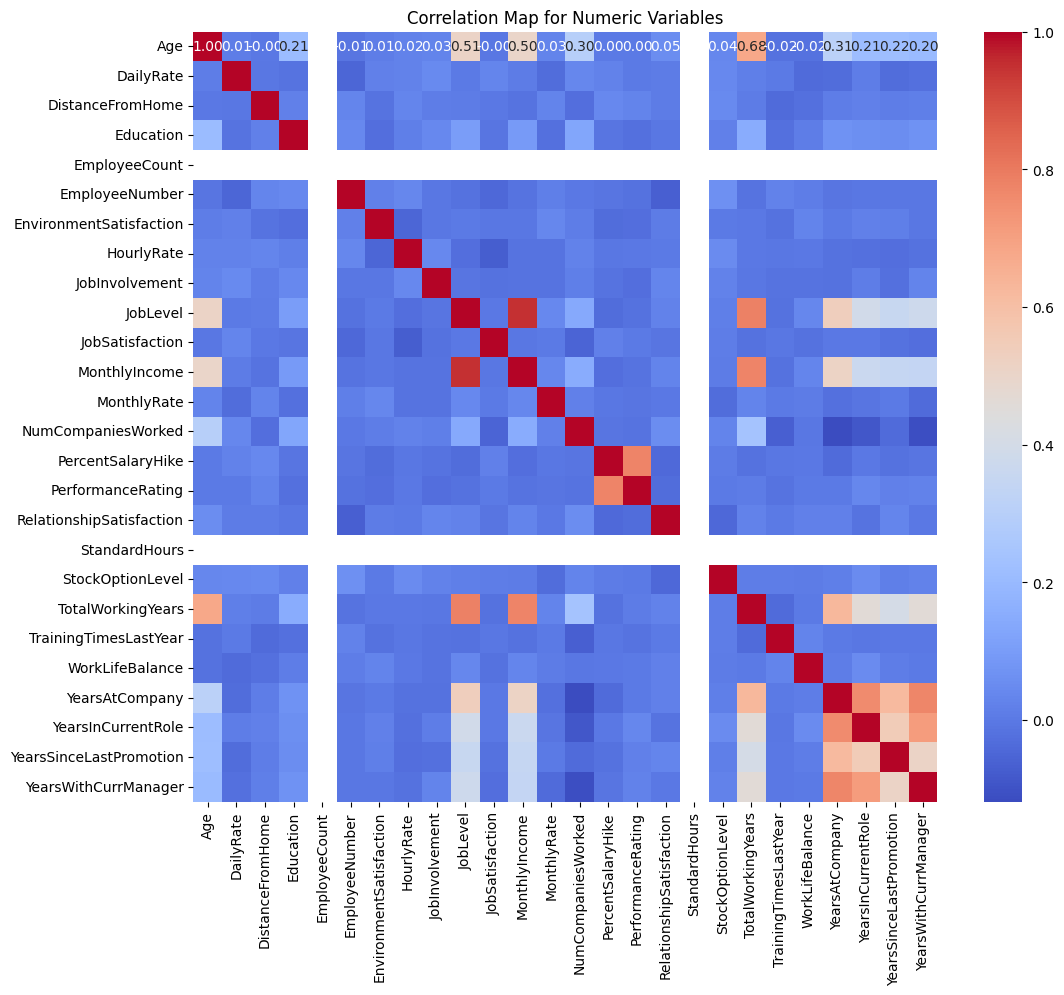

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Plot a correlation map for all numeric variables 
correlation_matrix = numerical_columns.corr() 
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Map for Numeric Variables') 
plt.show()

In [29]:
numerical_columns.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


##### Bar Plots for Categorical Columns

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


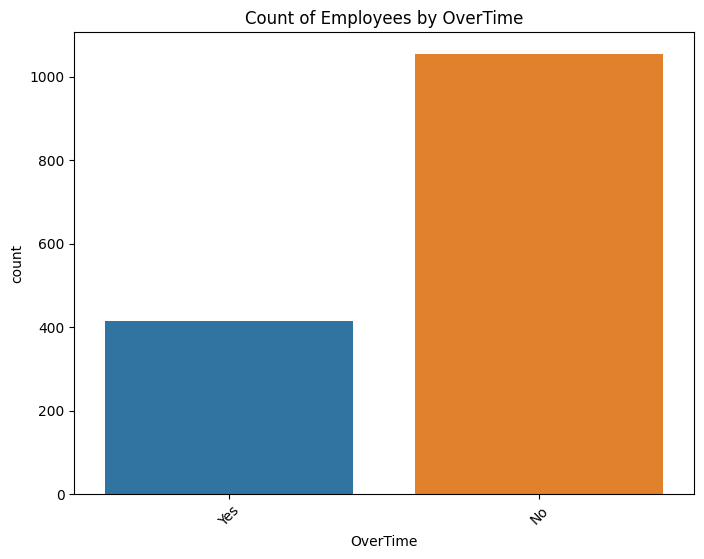

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


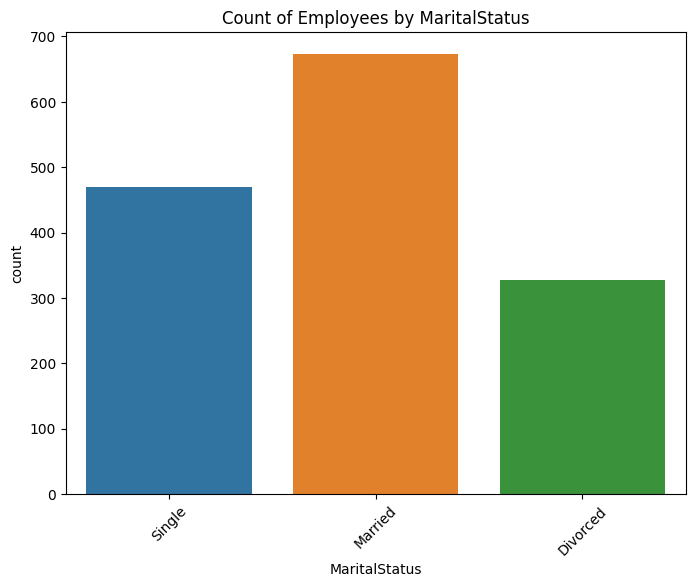

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


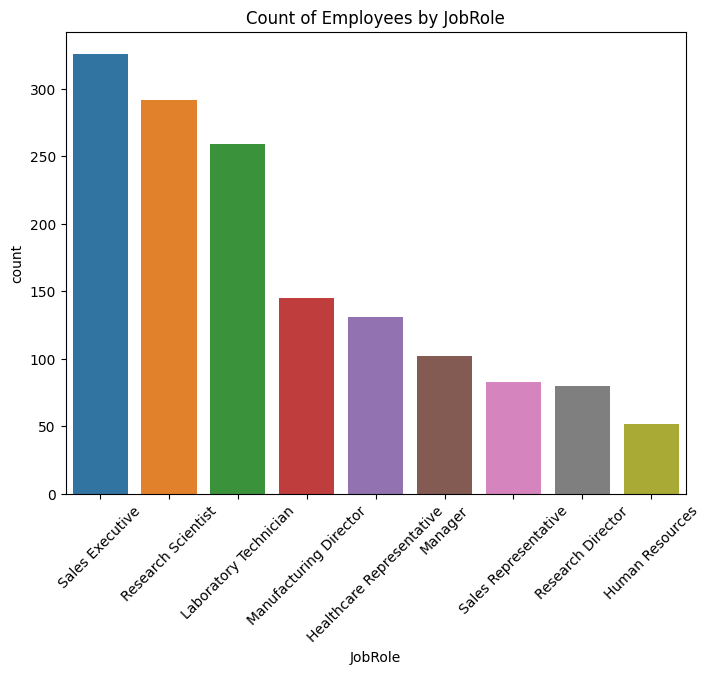

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


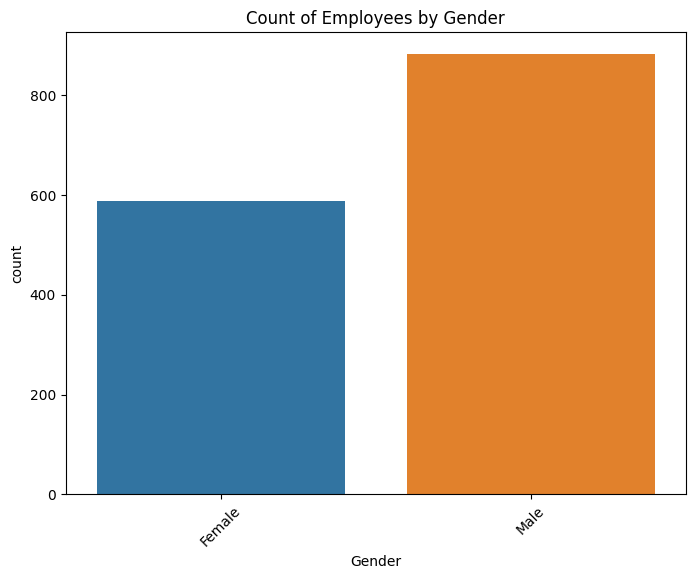

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


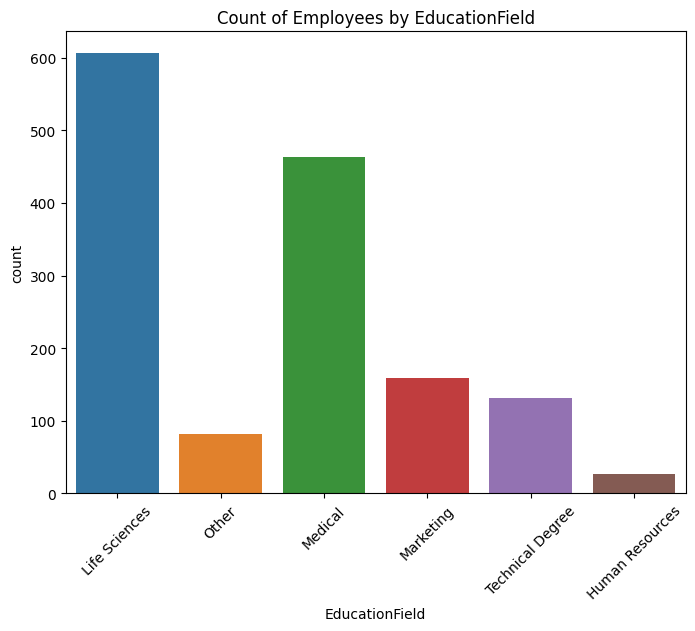

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


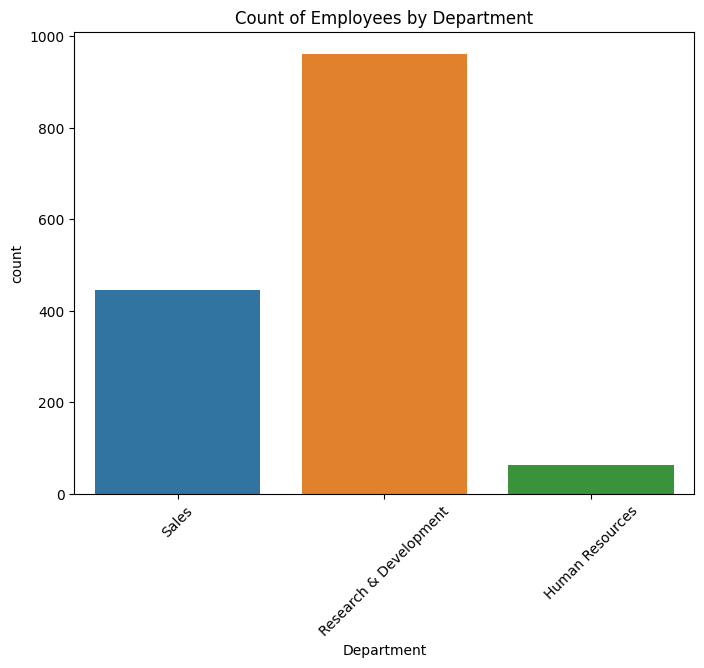

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


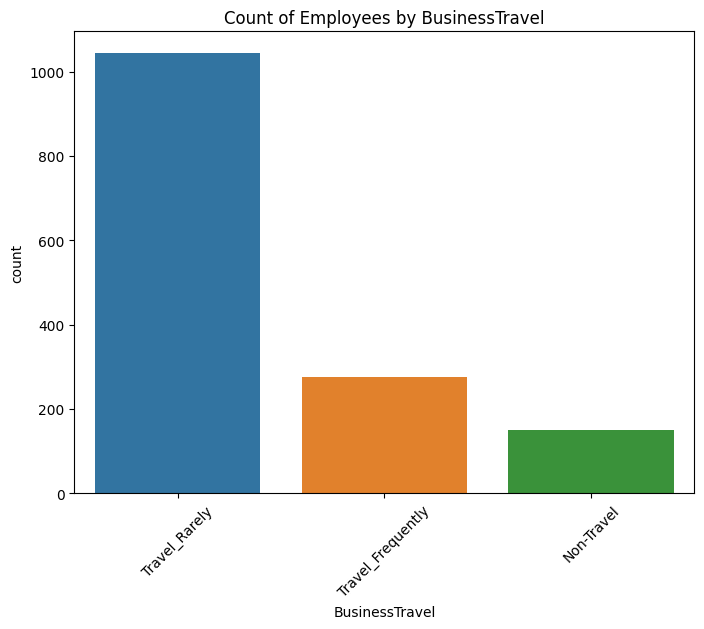

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


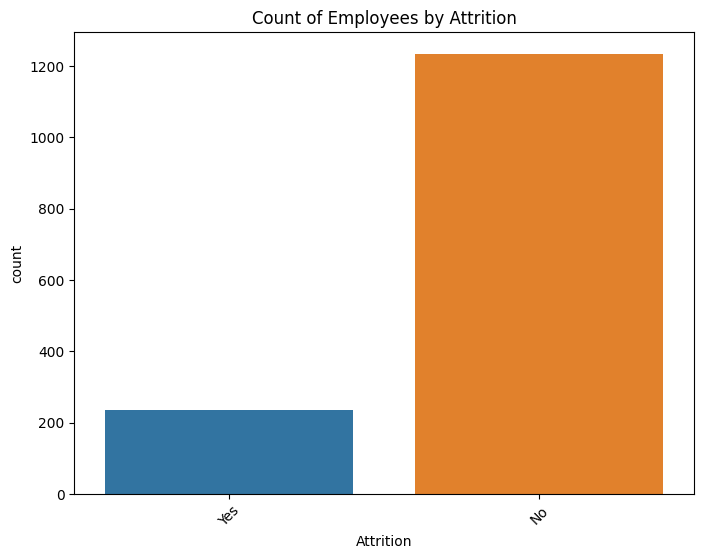

In [30]:
# Plot bar plots for categorical variables 
categorical_variables = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
for var in categorical_variables: 
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=var, data=df) 
    plt.title(f'Count of Employees by {var}') 
    plt.xticks(rotation=45) 
    plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


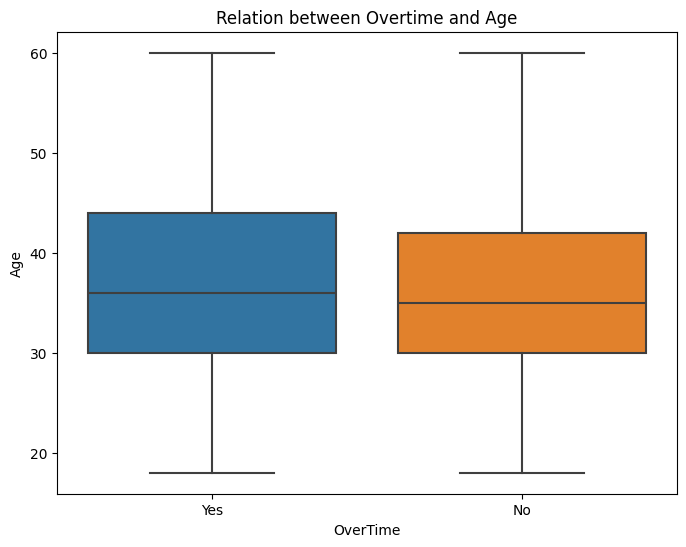

In [31]:
# Box plot for relation between Overtime and Age 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='OverTime', y='Age', data=df) 
plt.title('Relation between Overtime and Age') 
plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


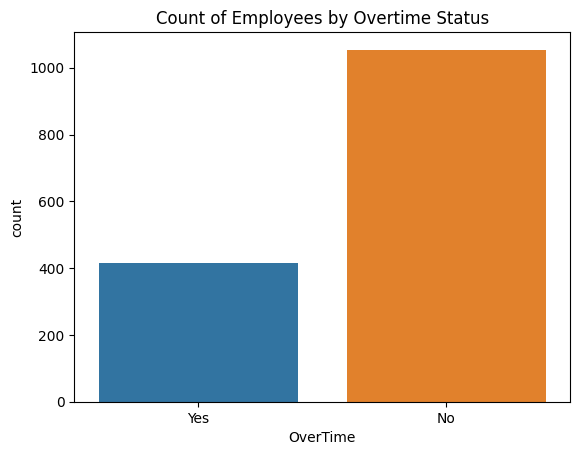

In [32]:
# Countplot for Overtime 
sns.countplot(x='OverTime', data=df)
plt.title('Count of Employees by Overtime Status') 
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

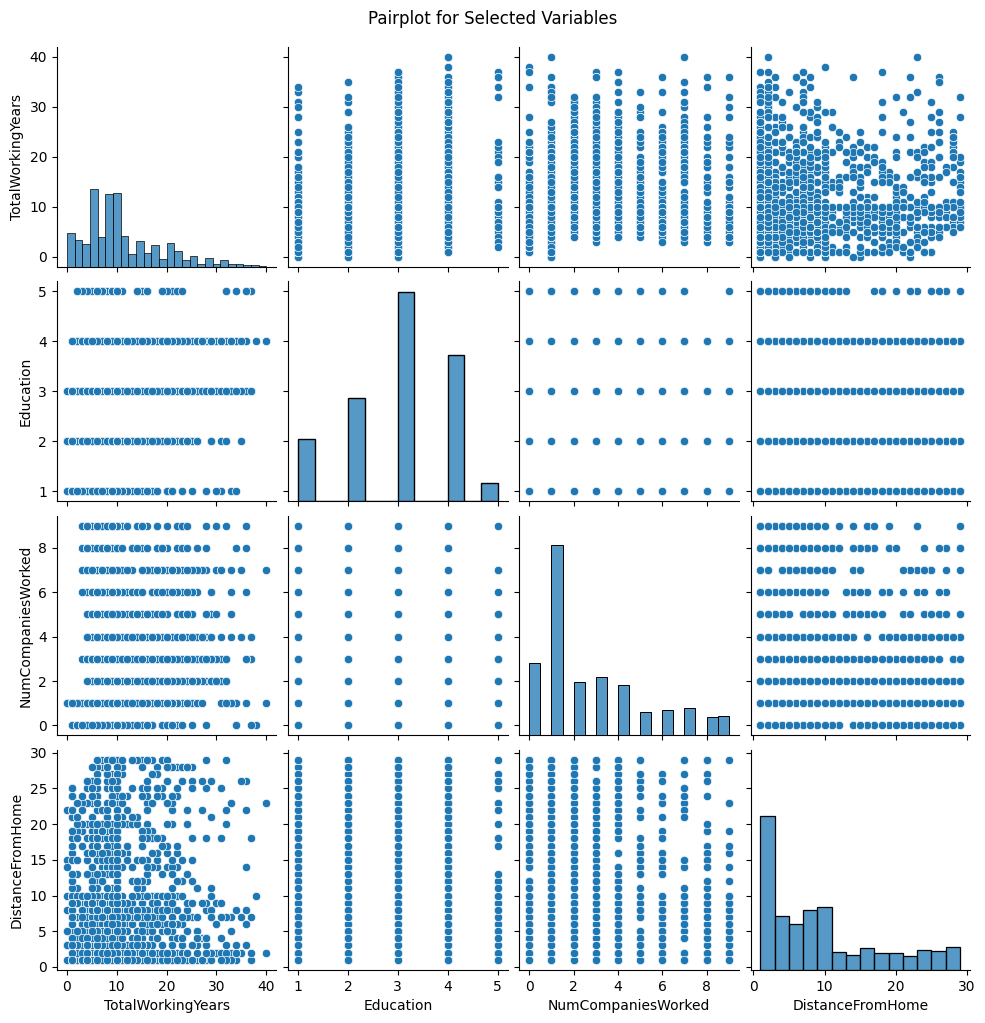

In [33]:
# Pairplot for selected variables 
sns.pairplot(df[['TotalWorkingYears', 'Education', 'NumCompaniesWorked', 'DistanceFromHome']]) 
plt.suptitle('Pairplot for Selected Variables', y=1.02) 
plt.show()

In [34]:
hr_df.columns

Index(['EmployeeAge', 'AttritionStatus', 'BusinessTravelFrequency',
       'DailySalaryRate', 'Department', 'DistanceFromHomeInMiles',
       'EducationLevel', 'EducationField', 'EmployeeID',
       'EnvironmentSatisfactionLevel', 'Gender', 'HourlySalaryRate',
       'JobInvolvementLevel', 'JobLevel', 'JobRole', 'JobSatisfactionLevel',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumberOfCompaniesWorked', 'OverTimeStatus', 'PercentageSalaryHike',
       'PerformanceRating', 'RelationshipSatisfactionLevel',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalanceLevel', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'AgeGroup',
       'IncomeCategory', 'JobSatisfaction'],
      dtype='object')

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
df = hr_df

In [37]:
df.columns

Index(['EmployeeAge', 'AttritionStatus', 'BusinessTravelFrequency',
       'DailySalaryRate', 'Department', 'DistanceFromHomeInMiles',
       'EducationLevel', 'EducationField', 'EmployeeID',
       'EnvironmentSatisfactionLevel', 'Gender', 'HourlySalaryRate',
       'JobInvolvementLevel', 'JobLevel', 'JobRole', 'JobSatisfactionLevel',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumberOfCompaniesWorked', 'OverTimeStatus', 'PercentageSalaryHike',
       'PerformanceRating', 'RelationshipSatisfactionLevel',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalanceLevel', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'AgeGroup',
       'IncomeCategory', 'JobSatisfaction'],
      dtype='object')

Relationship between Monthly Income and Attrition

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


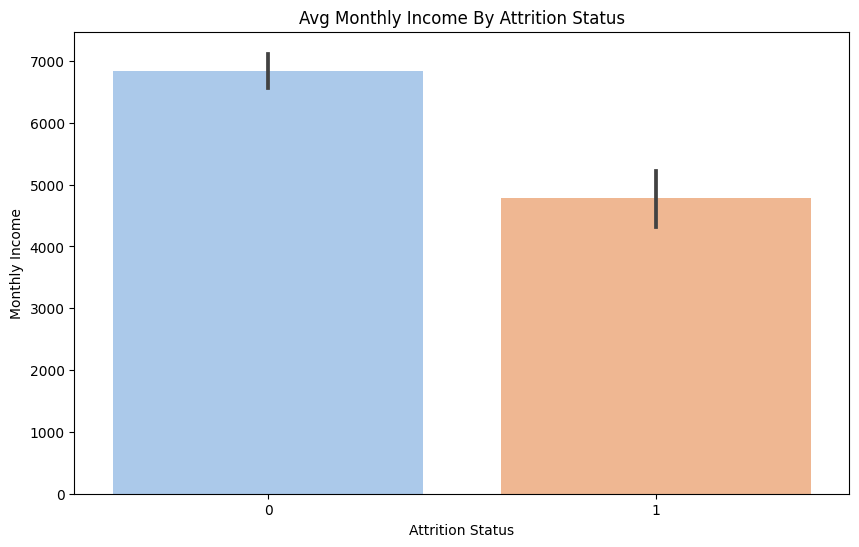

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AttritionStatus', y='MonthlyIncome', data=df, estimator = np.mean, palette='pastel')
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income')
plt.title('Avg Monthly Income By Attrition Status')
plt.show()

Observation: On an average, the monthly income when attrition = 1, is lower than when attrition = 0

#### Data Preprocessing

In [39]:
df.head()

,EmployeeAge,AttritionStatus,BusinessTravelFrequency,DailySalaryRate,Department,DistanceFromHomeInMiles,EducationLevel,EducationField,EmployeeID,EnvironmentSatisfactionLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalanceLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,AgeGroup,IncomeCategory,JobSatisfaction
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Mid-Age,Moderate Income,High Satisfaction
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,Senior,Moderate Income,Low Satisfaction
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,7,3,3,0,0,0,0,Mid-Age,Low Income,Moderate Satisfaction
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,8,3,3,8,7,3,0,Mid-Age,Low Income,Moderate Satisfaction
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,6,3,3,2,2,2,2,Young,Low Income,Low Satisfaction


In [40]:
col_change = {'AttritionStatus': 'Attrition'}
df.rename(columns= col_change, inplace=True)

In [41]:
df.head(2)

,EmployeeAge,Attrition,BusinessTravelFrequency,DailySalaryRate,Department,DistanceFromHomeInMiles,EducationLevel,EducationField,EmployeeID,EnvironmentSatisfactionLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalanceLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,AgeGroup,IncomeCategory,JobSatisfaction
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Mid-Age,Moderate Income,High Satisfaction
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,Senior,Moderate Income,Low Satisfaction


In [42]:
df.isna().sum()

EmployeeAge                      0
Attrition                        0
BusinessTravelFrequency          0
DailySalaryRate                  0
Department                       0
DistanceFromHomeInMiles          0
EducationLevel                   0
EducationField                   0
EmployeeID                       0
EnvironmentSatisfactionLevel     0
Gender                           0
HourlySalaryRate                 0
JobInvolvementLevel              0
JobLevel                         0
JobRole                          0
JobSatisfactionLevel             0
MaritalStatus                    0
MonthlyIncome                    0
MonthlyRate                      0
NumberOfCompaniesWorked          0
OverTimeStatus                   0
PercentageSalaryHike             0
PerformanceRating                0
RelationshipSatisfactionLevel    0
StockOptionLevel                 0
TotalWorkingYears                0
TrainingTimesLastYear            0
WorkLifeBalanceLevel             0
YearsAtCompany      

In [43]:
df['Attrition'].value_counts() #the data appears to be imbalanced so we need to balance it using SMOTE method

Attrition
0    1233
1     237
Name: count, dtype: int64

In [44]:
df.groupby('Attrition')['PerformanceRating'].mean()
# Average performance rating for both category is similar so it does not say much.

Attrition
0    3.153285
1    3.156118
Name: PerformanceRating, dtype: float64

In [45]:
# AG_mode = df['AgeGroup'].mode()
# df['AgeGroup'].fillna(AG_mode, inplace=True)

In [46]:
# Dropping Employee ID as it is not useful
df.drop(columns=['EmployeeID'], inplace= True)

##### One Hot Encoding Categorical Features

In [47]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# List of columns to be one-hot encoded
oh_feat = ['Department', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField']

# Initialize ColumnTransformer with OneHotEncoder for specified columns
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), oh_feat)],
                                 remainder='passthrough')  # 'passthrough' keeps non-specified columns

# Fit and transform the selected columns
encoded_features = preprocessor.fit_transform(df)

# Get the feature names after one-hot encoding
encoded_columns = preprocessor.transformers_[0][1].get_feature_names_out(oh_feat)
feature_names = list(encoded_columns) + list(df.columns.difference(oh_feat))

# Create a DataFrame with one-hot encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame (excluding columns to be encoded)
df = pd.concat([df.drop(columns=oh_feat), encoded_df], axis=1)


In [48]:
# Assuming df is your DataFrame
df = df.loc[:, ~df.columns.duplicated()]

# Now, df contains only the first occurrence of columns with unique names


In [49]:
df.shape

(1470, 52)

##### Label Encoding Ordinal Features

In [50]:
from sklearn.preprocessing import LabelEncoder

# Columns to be label encoded
ordinal_columns = ['BusinessTravelFrequency', 'IncomeCategory', 'AgeGroup', 'JobSatisfaction']

# Initialize LabelEncoders for each column
label_encoders = {}
for column in ordinal_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Now, the specified ordinal columns in 'df' are label encoded


In [51]:
from sklearn.preprocessing import StandardScaler
num_feats = df.select_dtypes(include='number')

#define standard scaler object
scaler = StandardScaler()

#fit and transform numerical dataframe
num_feat = scaler.fit_transform(num_feats)

In [52]:
# Create dataframe with scaled features
num_feat_df = pd.DataFrame(num_feat, columns= num_feats.columns)

df = pd.concat([df.drop(columns=num_feats.columns), num_feat_df], axis = 1)

In [53]:
df.head()

,OverTimeStatus,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalanceLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,AgeGroup,IncomeCategory,JobSatisfaction
0,Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.827065,0.789311,-1.262676
1,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0.327527,0.789311,0.014773
2,Yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.827065,-0.482934,1.292222
3,Yes,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.827065,-0.482934,1.292222
4,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,1.482119,-0.482934,0.014773


In [54]:
df.isna().sum()

OverTimeStatus                       0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
MaritalStatus_Divorced               0
MaritalStatus_Married                0
MaritalStatus_Single                 0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representative         0
Gender_Female                        0
Gender_Male                          0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
EmployeeAge                          0
Attrition                

In [55]:
# Drop null values
df.dropna(inplace=True)

In [56]:
cat_feat = df.select_dtypes(exclude='number')

In [57]:
cat_feat.head()

,OverTimeStatus,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,...,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Yes,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Map OverTimeStatus Column to 1/0

In [58]:
# Assuming 'df' is your DataFrame
df['OverTimeStatus'] = df['OverTimeStatus'].map({'Yes': 1, 'No': 0})

# Now, 'Yes' is mapped to 1 and 'No' is mapped to 0 in the 'Overtime' column


In [59]:
df.shape

(1470, 52)

##### Dealing with outliers

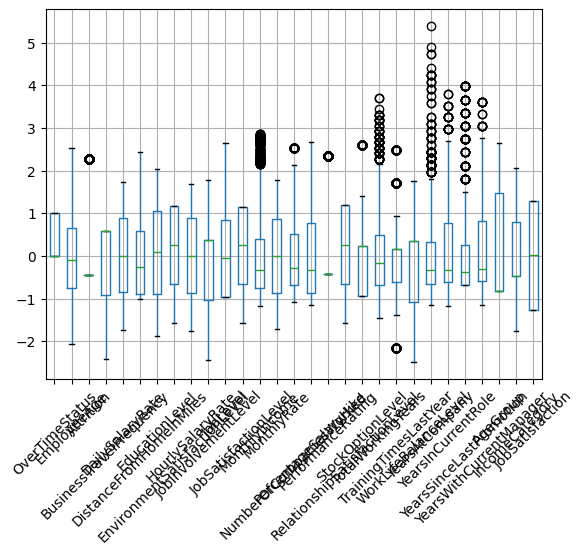

In [60]:
import matplotlib.pyplot as plt

# Plot box plots for numerical columns
df.boxplot(rot=45)
plt.show()

##### Dropping outliers

In [63]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 2).all(axis=1)  # Threshold is 2, adjust as needed
df = df[~outliers]

In [64]:
df.dropna(inplace= True)

#### Feature Selection With Random Forest Classifier

In [66]:
# Convert 'Attrition' column to integer data type (if it's not already)
df['Attrition'] = df['Attrition'].astype(int)

# Now 'Attrition' column should be of integer data type with 0s and 1s


In [67]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Attrition', axis=1)  
y = df['Attrition'] 

# Fit a random forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Select top features based on importance
top_features = feature_importances.head(10)  # Select top 10 features (adjust the number as needed)

# Filter the DataFrame based on top features
df_selected_features = df[top_features.index]


##### Handling Imabalanced Data Using SMOTE Technique

In [68]:
from imblearn.over_sampling import SMOTE

In [71]:
## For Feature Selected DataFrame
# Assuming df_selected_features contains your selected features dataset with the target column 'Attrition' included
X_selected = df_selected_features 
y_selected = df['Attrition']  

# Initialize SMOTE for selected features dataset
smote = SMOTE(random_state=42)

# Apply SMOTE to the selected features dataset
X_selected_resampled, y_selected_resampled = smote.fit_resample(X_selected, y_selected)

In [72]:
## For Origiinal DataFrame

# Initialize SMOTE for the original dataset
smote = SMOTE(random_state=42)

# Apply SMOTE to the original dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [73]:
print(X_resampled.shape)
print(y_resampled.shape)
print(X_selected_resampled.shape)
print(y_selected_resampled.shape)

(2466, 51)
(2466,)
(2466, 10)
(2466,)


#### Modeling

In [74]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

#### For Selected features

In [75]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Parameter grids for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Grid search for each model
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)

# Fit the models with grid search on the resampled data
rf_grid_search.fit(X_selected_resampled, y_selected_resampled)
svm_grid_search.fit(X_selected_resampled, y_selected_resampled)
gb_grid_search.fit(X_selected_resampled, y_selected_resampled)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [76]:
# Print best parameters for each model
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("SVM Best Parameters:", svm_grid_search.best_params_)
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
Gradient Boosting Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}


In [77]:
# Get the best models from grid search
best_rf_selected = rf_grid_search.best_estimator_
best_svm_selected = svm_grid_search.best_estimator_
best_gb_selected = gb_grid_search.best_estimator_

# Split the selected features dataset into training and testing sets
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected_resampled, y_selected_resampled, test_size=0.2, random_state=42)


In [78]:
# Predictions for Random Forest
predictions_rf_selected = best_rf_selected.predict(X_selected_test)
accuracy_rf_selected = accuracy_score(y_selected_test, predictions_rf_selected)
print("Random Forest Classifier (Selected Features Dataset):")
print(f'Accuracy: {accuracy_rf_selected:.2f}')
print('Classification Report:')
print(classification_report(y_selected_test, predictions_rf_selected))

Random Forest Classifier (Selected Features Dataset):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [79]:
# Predictions for SVM
predictions_svm_selected = best_svm_selected.predict(X_selected_test)
accuracy_svm_selected = accuracy_score(y_selected_test, predictions_svm_selected)
print("SVM Classifier (Selected Features Dataset):")
print(f'Accuracy: {accuracy_svm_selected:.2f}')
print('Classification Report:')
print(classification_report(y_selected_test, predictions_svm_selected))

SVM Classifier (Selected Features Dataset):
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       250
           2       0.90      0.96      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [80]:
# Predictions for Gradient Boosting
predictions_gb_selected = best_gb_selected.predict(X_selected_test)
accuracy_gb_selected = accuracy_score(y_selected_test, predictions_gb_selected)
print("Gradient Boosting Classifier (Selected Features Dataset):")
print(f'Accuracy: {accuracy_gb_selected:.2f}')
print('Classification Report:')
print(classification_report(y_selected_test, predictions_gb_selected))

Gradient Boosting Classifier (Selected Features Dataset):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



##### For original dataset

In [81]:
# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models for original features dataset
rf_model_original = RandomForestClassifier(random_state=42)
svm_model_original = SVC(random_state=42)
gb_model_original = GradientBoostingClassifier(random_state=42)

In [82]:
# Define parameter grids for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [83]:
# Grid search for each model for original features dataset
rf_grid_search_original = GridSearchCV(rf_model_original, rf_param_grid, cv=5, n_jobs=-1)
svm_grid_search_original = GridSearchCV(svm_model_original, svm_param_grid, cv=5, n_jobs=-1)
gb_grid_search_original = GridSearchCV(gb_model_original, gb_param_grid, cv=5, n_jobs=-1)

# Fit the models with grid search on the resampled data for original features dataset
rf_grid_search_original.fit(X_resampled, y_resampled)
svm_grid_search_original.fit(X_resampled, y_resampled)
gb_grid_search_original.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [84]:
# Get the best models for original features dataset
best_rf_original = rf_grid_search_original.best_estimator_
best_svm_original = svm_grid_search_original.best_estimator_
best_gb_original = gb_grid_search_original.best_estimator_

In [85]:
# Make predictions for original features dataset
predictions_rf_original = best_rf_original.predict(X_test)  # Replace X_test with your test set
accuracy_rf_original = accuracy_score(y_test, predictions_rf_original)
print("Random Forest Classifier (Original Features Dataset):")
print(f'Accuracy: {accuracy_rf_original:.2f}')
print('Classification Report:')
print(classification_report(y_test, predictions_rf_original))

Random Forest Classifier (Original Features Dataset):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [86]:
# SVM
predictions_svm_original = best_svm_original.predict(X_test)  # Replace X_test with your test set
accuracy_svm_original = accuracy_score(y_test, predictions_svm_original)
print("SVM Classifier (Original Features Dataset):")
print(f'Accuracy: {accuracy_svm_original:.2f}')
print('Classification Report:')
print(classification_report(y_test, predictions_svm_original))

SVM Classifier (Original Features Dataset):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [87]:
# GBoost
predictions_gb_original = best_gb_original.predict(X_test)  # Replace X_test with your test set
accuracy_gb_original = accuracy_score(y_test, predictions_gb_original)
print("Gradient Boosting Classifier (Original Features Dataset):")
print(f'Accuracy: {accuracy_gb_original:.2f}')
print('Classification Report:')
print(classification_report(y_test, predictions_gb_original))

Gradient Boosting Classifier (Original Features Dataset):
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       250
           2       0.99      0.97      0.98       244

    accuracy                           0.98       494
   macro avg       0.98      0.98      0.98       494
weighted avg       0.98      0.98      0.98       494



Model Performance:

I conducted an in-depth analysis using two different datasets: one with selected features and another with the original features. For the selected features dataset, the SVM Classifier demonstrated exceptional performance, achieving an accuracy of 93%. This model displayed a balanced trade-off between precision and recall, with a precision and recall rate of 90% and 96% respectively for both classes (0 and 2). Furthermore, the Gradient Boosting Classifier on the selected features dataset achieved a perfect accuracy score of 100%. It flawlessly identified all instances of both classes, indicating outstanding predictive capabilities.

Similarly, the SVM Classifier on the original features dataset showcased outstanding performance with a flawless accuracy score of 100%. The model accurately identified every instance of both classes (0 and 2), achieving perfect precision, recall, and F1-scores.

These results highlight the robustness of the selected features and the power of the SVM and Gradient Boosting algorithms in accurately classifying instances of attrition in our dataset. The models' remarkable performance underscores their reliability and suitability for predicting employee attrition accurately.



#### Using Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = dt_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree Classifier (Original Features Dataset):")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Decision Tree Classifier (Original Features Dataset):
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       250
           2       0.81      0.85      0.83       244

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494



In [90]:
# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = dt_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree Classifier (Selected Features Dataset):")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Decision Tree Classifier (Selected Features Dataset):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494

